<h1>Working with images in OpenCV</h1>
<p><b>by Dominique De Guzman</b></p>

<p>This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV.</p>

In [ ]:
#install opencv-python
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 36.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.0 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja2 3.0.1 which is incompatible.


In [ ]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

<h3>Display image directly</h3>

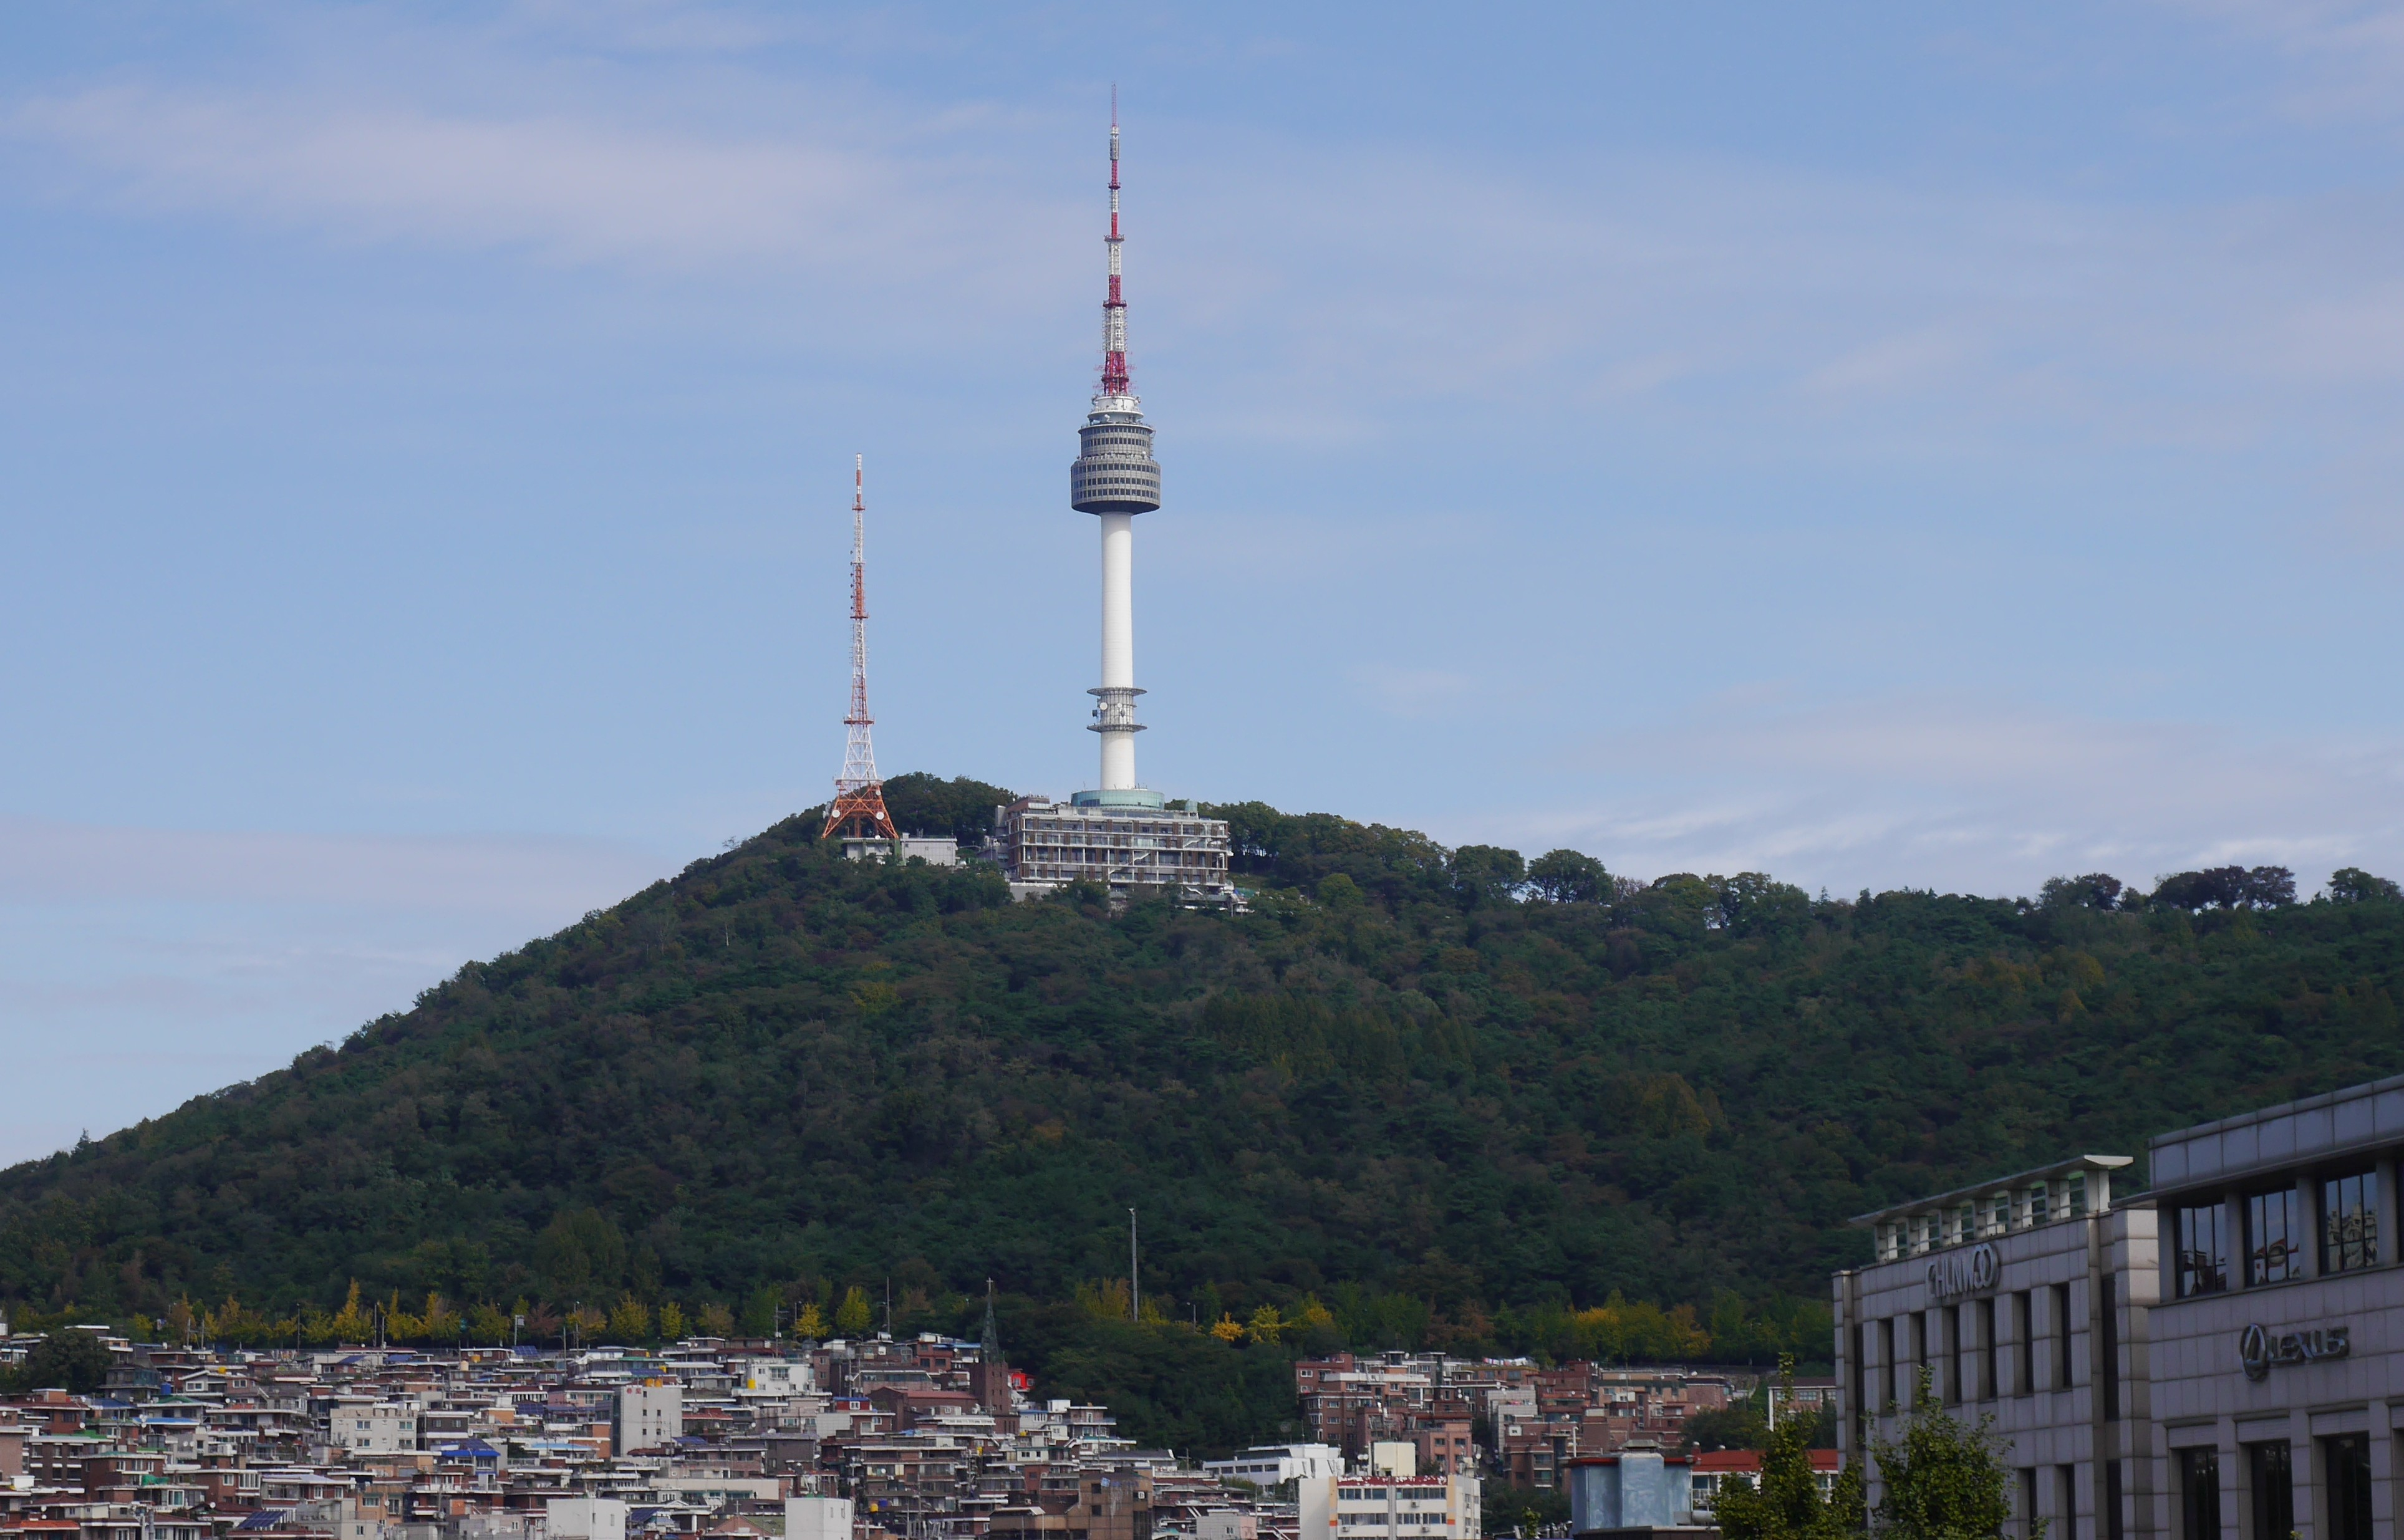

In [ ]:
Image(filename='NamsanTower.jpeg') 

<h3>Display image using OpenCV</h3>

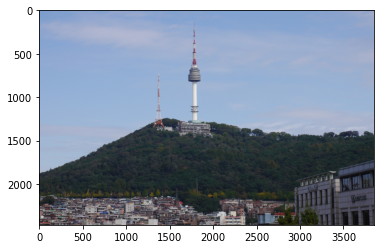

In [ ]:
#Image displayed but in reversed color channels
img = cv2.imread('NamsanTower.jpeg',1)

#change BGR to RGB to see original colors
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<h3>Looking at each channels</h3>

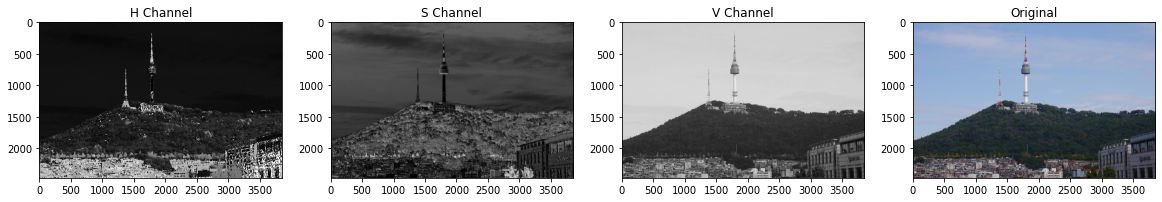

In [ ]:
#Changing to HSV Color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img);plt.title("Original");

<h3>Changing an image's brightness</h3>

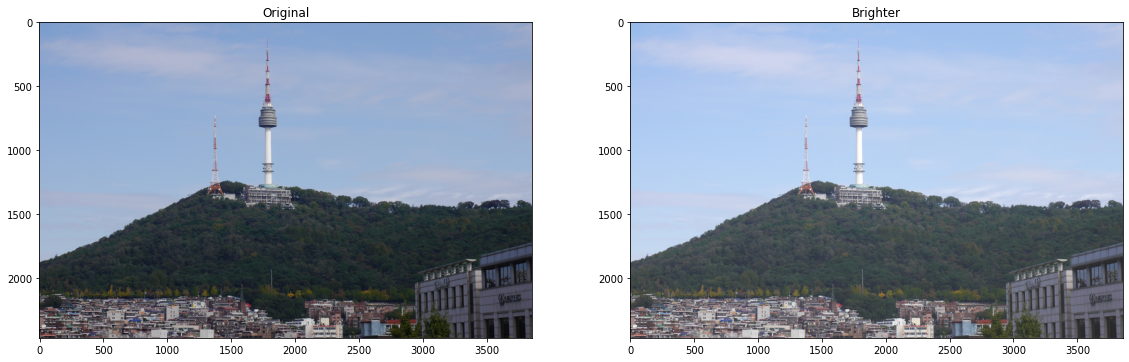

In [ ]:
#Read image; convert to RGB
sample = cv2.imread('NamsanTower-Copy.jpeg')
sample_img = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

matrix = np.ones(sample_img.shape, dtype = "uint8") * 30

sample_img_brighter = cv2.add(sample_img, matrix)
#sample_img_darker   = cv2.subtract(sample_img, matrix)

# Show the images
plt.figure(figsize=[30,12])
#plt.subplot(131); plt.imshow(sample_img_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(sample_img);         plt.title("Original");
plt.subplot(133); plt.imshow(sample_img_brighter);plt.title("Brighter");

<h3>Changing an image's contrast</h3>

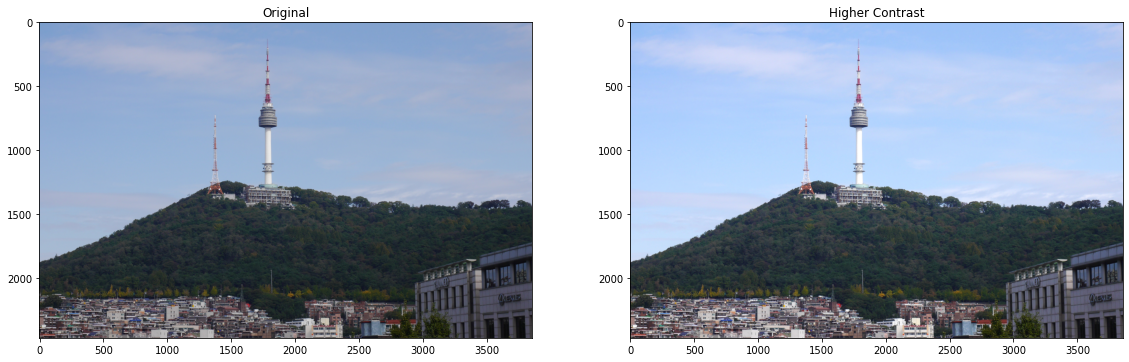

In [ ]:
matrix1 = np.ones(sample_img.shape) * .8
matrix2 = np.ones(sample_img.shape) * 1.2

#sample_img_lower   = np.uint8(cv2.multiply(np.float64(sample_img), matrix1))
sample_img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(sample_img), matrix2),0,255))

# Show the images
plt.figure(figsize=[30,12])
#plt.subplot(131); plt.imshow(sample_img_lower);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(sample_img);         plt.title("Original");
plt.subplot(133); plt.imshow(sample_img_higher);plt.title("Higher Contrast");

<h3>Combine both brightness and contrast adjustment</h3>

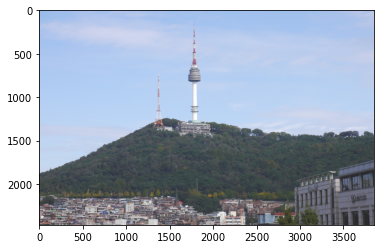

In [ ]:
#Read image; convert to RGB
sample = cv2.imread('NamsanTower-Copy.jpeg')
sample_img = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

#brightness
matrix0 = np.ones(sample_img.shape, dtype = "uint8") * 30
sample_img_brighter = cv2.add(sample_img, matrix0)

#contrast using image with already adjusted brightness
matrix2 = np.ones(sample_img_brighter.shape) * 1

#combined
sample_img_brighter_higher  = np.uint8(np.clip(cv2.multiply(np.float64(sample_img_brighter), matrix2),0,255))

plt.imshow(sample_img_brighter_higher)